BZAN 542

Charles Liu

# Package

In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# Data

In [2]:
df = read.csv("LoanStats3a.csv", skip=1)
desc = df$desc
head(desc)

[1] "  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
[2] "  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>"
[3] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
[4] "  Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>"                                                                                                                                                                                                                                                                                                                                                                                                                          
[5] "  Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills.  I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>"                                                                                                                                                                                                                                                                                            
[6] ""

In [3]:
desc = tolower(desc)
head(desc)

[1] "  borrower added on 12/22/11 > i need to upgrade my business technologies.<br>"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
[2] "  borrower added on 12/22/11 > i plan to use this money to finance the motorcycle i am looking at. i plan to have it paid off as soon as possible/when i sell my old bike. i only need this money because the deal im looking at is to good to pass up.<br><br>  borrower added on 12/22/11 > i plan to use this money to finance the motorcycle i am looking at. i plan to have it paid off as soon as possible/when i sell my old bike.i only need this money because the deal im looking at is to good to pass up. i have finished college with an associates degree in business and its takingmeplaces<br>"
[3] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
[4] "  borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central a/c need to be replace. i'm very sorry to let my loan expired last time.<br>"                                                                                                                                                                                                                                                                                                                                                                                                                          
[5] "  borrower added on 12/21/11 > i plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills.  i've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. my job is very stable, i love it.<br>"                                                                                                                                                                                                                                                                                            
[6] ""

# Term Frequency

In [4]:
dtf <- udpipe::document_term_frequencies(desc)
head(dtf)

doc_id,term,freq
<chr>,<chr>,<int>
doc1,,1
doc1,borrower,1
doc1,added,1
doc1,on,1
doc1,i,1
doc1,need,1


In [5]:
dtm <- udpipe::document_term_matrix(dtf)
dim(dtm)

[1] 29243 23243

In [6]:
dtm <- udpipe::dtm_remove_lowfreq(dtm)
dim(dtm)

[1] 29241  7515

In [7]:
tfidf <- udpipe::dtm_tfidf(dtm)
tfidf <- tfidf[order(tfidf, decreasing = TRUE)]
head(tfidf, 20)

camping             ranger          motorcyle                cfa 
         2.9341180          1.1837846          1.1438180          1.1029051 
        membership         cosolidate       consoldation        consoladate 
         1.0733375          1.0013737          0.9982438          0.9752149 
               vtx          carpentry            unknown               sean 
         0.9693221          0.9651932          0.9574471          0.9352007 
    consolidations      consolodation         improvment           desiring 
         0.9034715          0.8946120          0.8696498          0.8406897 
           wyndham collegeclassifieds            triumph         snowmobile 
         0.8277695          0.8177160          0.7825338          0.7730101

In [8]:
tail(tfidf, 20)

credit       with         is         of       loan        the         in 
0.02881117 0.02868735 0.02843524 0.02696949 0.02671297 0.02644520 0.02601098 
      this          i        for       have         my          a         br 
0.02574482 0.02518083 0.02489899 0.02421114 0.02392717 0.02188947 0.02018614 
       and   borrower      added                    to         on 
0.01930958 0.01785906 0.01486783 0.01468910 0.01436775 0.01054480

In [9]:
dtm <- udpipe::dtm_remove_tfidf(dtm, prob = 0.2)
dim(dtm)

[1] 27624  6012

# Topic Models

In [10]:
lda <- topicmodels::LDA(dtm, control = list(alpha = 0.1), k = 3)
lda

A LDA_VEM topic model with 3 topics.

In [11]:
lda_inf <- topicmodels::posterior(lda, head(dtm, 10))
lda_inf

$terms
             â            ã          â‚â          ã‚â          â„â
1 1.092351e-47 2.034223e-03 1.666179e-11 4.088276e-13 7.894739e-11
2 7.001844e-26 9.150289e-11 8.523325e-05 8.325387e-04 2.891256e-05
3 5.726742e-05 1.846110e-08 8.234099e-05 1.076808e-10 2.947521e-05
             â\200          â\200â         â\200â“      â\200âšã‚â  â\200âšãƒâ‚ã‚â
1  8.565268e-05 1.134898e-03 3.853977e-04 1.457915e-38 1.682941e-48
2  1.941423e-13 4.808827e-29 9.539909e-09 2.117967e-05 1.005660e-29
3 4.832347e-146 1.649088e-23 1.949904e-08 3.499392e-05 5.010899e-05
         â\200â\231t       â\200â\231ve           aa         aaron    abandoned
1 3.233566e-04 3.529512e-04 2.476536e-05 3.489143e-102 2.863822e-05
2 3.984196e-06 9.763761e-09 8.788452e-05  6.018353e-05 2.332290e-05
3 1.174064e-04 2.377891e-07 2.094020e-05  1.452384e-37 8.880961e-72
     abilities     ablation       aboard       abroad     absolute   absolutely
1 7.388820e-05 9.635926e-05 4.369115e-17 7.522634e-07 8.063988e-12 1.001808e-06
2 1.947788e-05 1.217675e-98 1.881475e-05 1.712011e-04 8.276481e-05 9.809754e-05
3 1.544044e-05 8.035691e-81 4.384009e-05 8.491210e-05 4.115207e-05 4.733624e-04
         abuse       abused      abusing           ac     academic      academy
1 7.205182e-16 1.792884e-08 4.217556e-28 5.459905e-04 4.401617e-05 1.129571e-12
2 6.311165e-05 4.191922e-05 3.282766e-07 4.245501e-08 2.003340e-04 2.607953e-04
3 1.222718e-05 2.733937e-05 4.271628e-05 3.962875e-12 3.519484e-05 1.399631e-12
    accelerate  accelerated accelerating       accept   acceptable   acceptance
1 6.733294e-05 6.301685e-06 2.404217e-17 0.0001266434 1.112846e-24 2.561035e-06
2 1.150235e-07 7.866414e-05 1.375920e-21 0.0002323005 7.166778e-17 4.024615e-05
3 3.557710e-04 6.849895e-05 6.442584e-05 0.0003794843 1.216933e-04 3.399148e-05
      accepted    accepting   accessible  accessories     accident accidentally
1 7.058521e-06 1.433524e-04 1.503487e-04 2.608801e-04 1.687375e-09 1.774471e-16
2 5.594607e-04 4.371269e-09 7.248801e-14 6.653972e-05 7.291283e-04 5.555456e-18
3 2.617498e-04 5.447834e-05 2.832851e-05 5.995413e-23 7.379885e-05 7.874270e-05
   accommodate accommodations   accomodate   accomplish accomplished
1 2.617521e-04   9.765419e-17 3.991581e-05 6.392517e-05 3.562653e-05
2 4.566156e-05   5.015295e-05 5.728694e-05 4.404185e-05 1.165852e-05
3 2.143755e-12   2.035184e-45 1.117159e-05 6.201961e-04 7.523627e-05
  accomplishing accomplishment       accord   accordance    according
1  1.610039e-05   1.297281e-10 4.195598e-26 7.494946e-05 3.748663e-04
2  3.188244e-05   1.190052e-06 1.504588e-04 2.005789e-05 6.921551e-05
3  2.274194e-06   6.357646e-05 2.353400e-13 9.126702e-11 2.941173e-04
   accordingly  accountable   accountant    accounted   accounting     accounts
1 1.742377e-05 5.615217e-05 0.0001770419 4.715376e-05 0.0002364617 1.180926e-04
2 2.766517e-05 3.483101e-12 0.0002374851 7.619052e-05 0.0005349845 2.344654e-08
3 9.030020e-05 2.688248e-05 0.0002132360 9.008358e-14 0.0004622845 9.541952e-03
        accrue      accrued     accruing         acct        accts  accumalated
1 5.632085e-08 5.504419e-10 1.064238e-18 3.917624e-19 1.217973e-05 8.511867e-27
2 1.972075e-09 4.594070e-04 1.854290e-05 3.995955e-18 9.265120e-09 5.074007e-08
3 1.789216e-04 1.118142e-03 1.370937e-04 2.290697e-04 1.278601e-04 5.723120e-05
    accumlated  accumulated accumulating accumulation     accurate   accurately
1 1.474403e-28 1.773805e-08 3.457649e-20 1.026946e-05 5.011386e-05 3.673431e-05
2 5.315011e-29 2.184019e-04 2.757033e-05 8.150302e-15 4.054087e-09 5.783919e-09
3 4.295056e-05 2.235038e-03 1.091759e-04 2.892597e-05 7.386737e-05 3.270272e-05
           ach      acheive     achieved  achievement    achieving  acknowledge
1 1.423479e-05 1.436395e-05 6.928706e-05 3.933236e-05 3.005197e-05 2.585126e-05
2 1.105451e-37 3.478449e-09 1.263123e-05 1.759249e-10 8.611191e-12 1.234231e-05
3 4.775003e-05 5.481962e-05 4.487822e-05 9.494374e-06 1.159174e-04 9.699769e-06
       acounts      acquire     acquir

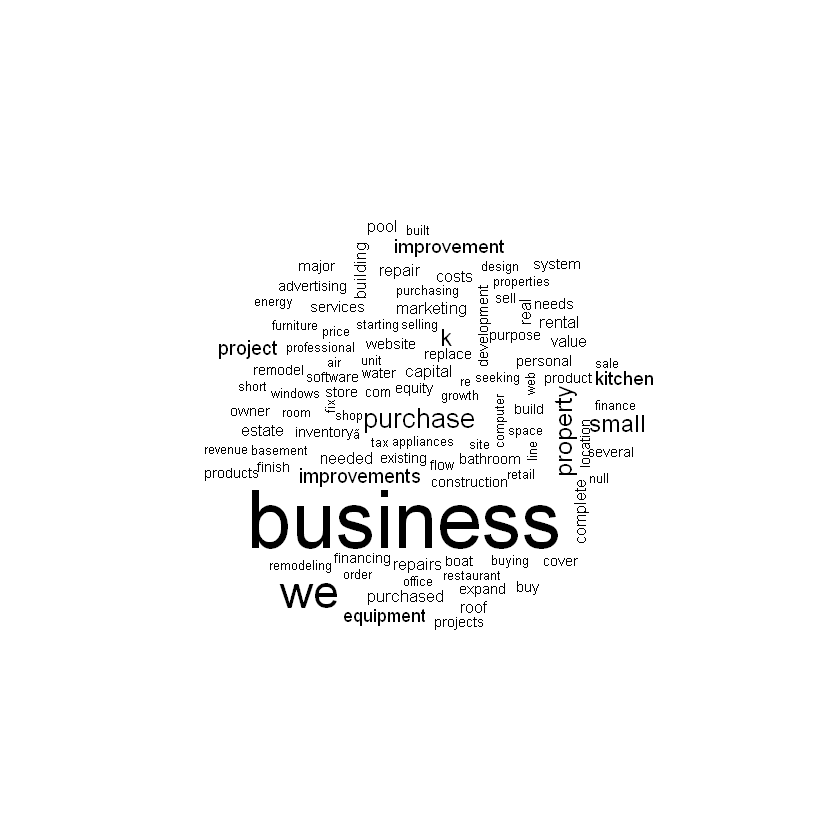

In [12]:
wordcloud::wordcloud(words=colnames(lda_inf$terms), freq=lda_inf$terms[1,], max.words=100)

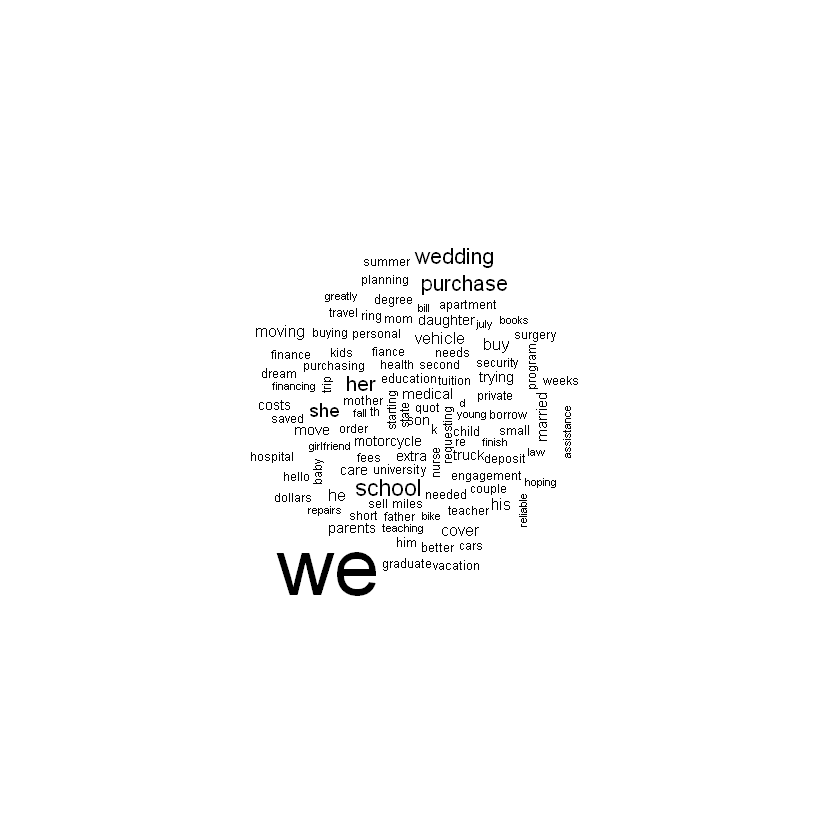

In [13]:
wordcloud::wordcloud(words=colnames(lda_inf$terms), freq=lda_inf$terms[2,], max.words=100)

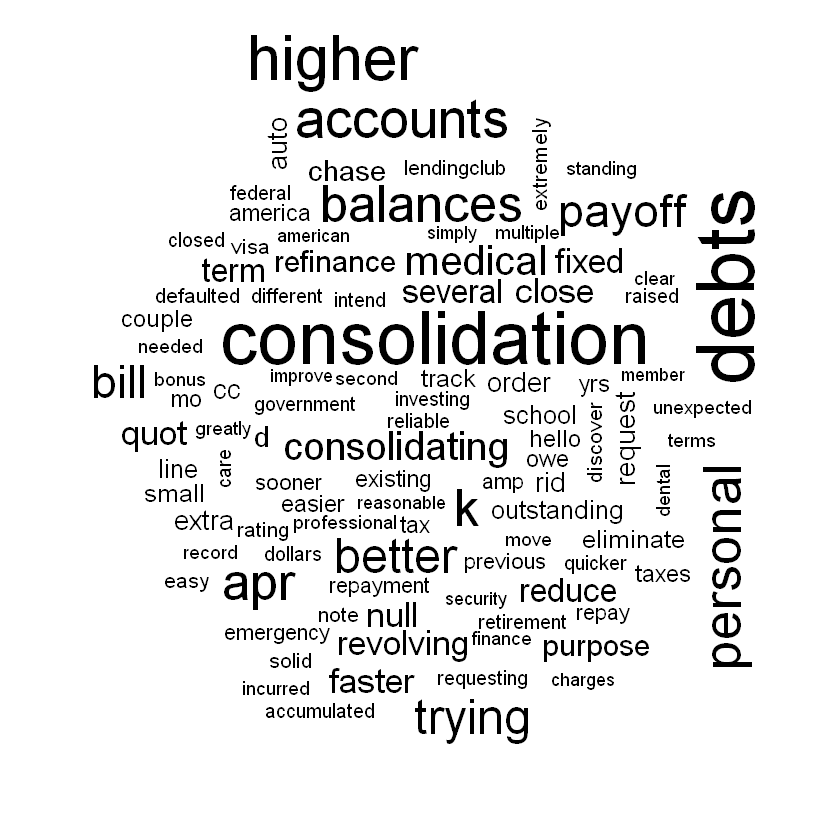

In [14]:
wordcloud::wordcloud(words=colnames(lda_inf$terms), freq=lda_inf$terms[3,], max.words=100)

In [15]:
topics <- data.frame(lda_inf$topics)
topics

topics$k <- max.col(topics)
topics

tapply(topics$X1, topics$k, FUN = mean)

aggregate(X1~k, data = topics, FUN = mean)

topics %>%
  group_by(k) %>%
  summarize(mean(X1))

,X1,X2,X3
,<dbl>,<dbl>,<dbl>
doc1,0.91655358,0.04172377,0.041722656
doc2,0.09786027,0.89341577,0.008723967
doc4,0.70772794,0.27521096,0.017061100
doc5,0.01931688,0.01930640,0.961376720
doc7,0.91626519,0.04188256,0.041852245
doc8,0.10039666,0.79940634,0.100196996
doc9,0.87437898,0.01068151,0.114939507
doc10,0.01705331,0.96586960,0.017077093
doc11,0.02643689,0.02636819,0.947194916


,X1,X2,X3,k
,<dbl>,<dbl>,<dbl>,<int>
doc1,0.91655358,0.04172377,0.041722656,1
doc2,0.09786027,0.89341577,0.008723967,2
doc4,0.70772794,0.27521096,0.017061100,1
doc5,0.01931688,0.01930640,0.961376720,3
doc7,0.91626519,0.04188256,0.041852245,1
doc8,0.10039666,0.79940634,0.100196996,2
doc9,0.87437898,0.01068151,0.114939507,1
doc10,0.01705331,0.96586960,0.017077093,2
doc11,0.02643689,0.02636819,0.947194916,3


1          2          3 
0.85373142 0.07177008 0.01983309

k,X1
<int>,<dbl>
1,0.85373142
2,0.07177008
3,0.01983309


,k,mean(X1)
,<int>,<dbl>
1,1,0.85373142
2,2,0.07177008
3,3,0.01983309


# Distributed Representations of Words: word2Vec

In [16]:
# https://github.com/maxoodf/word2vec#basic-usage
model <- word2vec::read.word2vec(file = "cb_hs_500_10.w2v", normalize = TRUE)
model

$model
<pointer: 0x0000000016abf970>

$model_path
[1] "cb_hs_500_10.w2v"

$dim
[1] 500

$vocabulary
[1] 437107

attr(,"class")
[1] "word2vec"

In [17]:
vec <- predict(model, c('king','queen','man','woman'), type='embedding')
vec[,1:2]

king,-2.0603213,-0.5728191
queen,-0.1538065,-0.3727129
man,1.7356501,0.8028086
woman,1.1695718,0.7635965


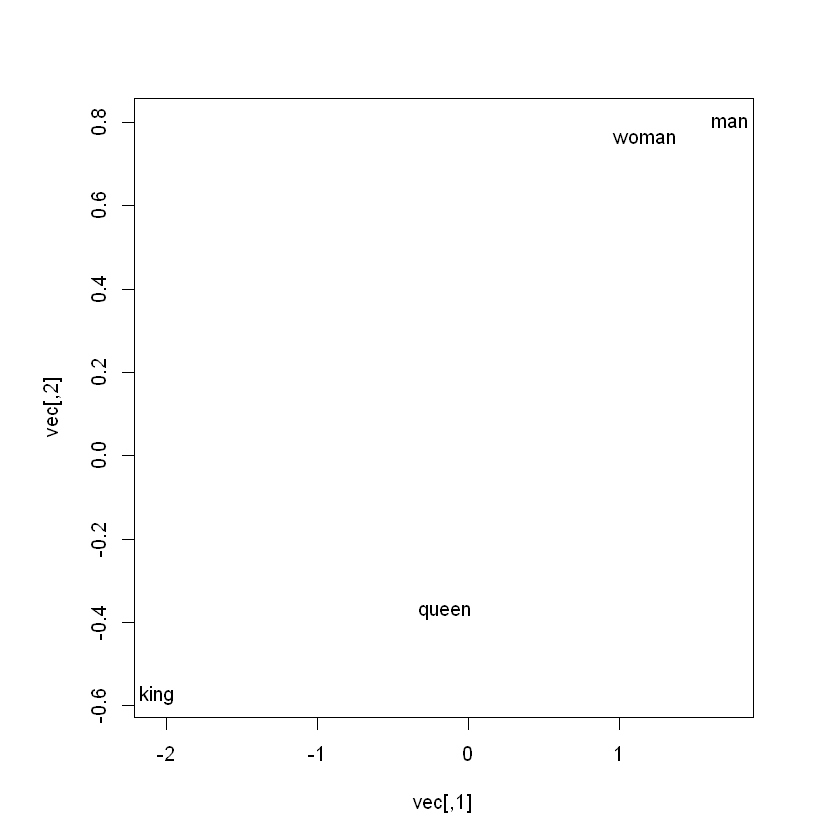

In [18]:
par(pty="s")
plot(vec, type = 'n')
text(vec, labels=row.names(vec))

In [19]:
predict(model, c("king", "queen", "man", "woman"), type = "nearest", top_n = 5)

term1,term2,similarity,rank
<chr>,<chr>,<dbl>,<int>
king,monarch,0.6807157,1
king,throne,0.6495371,2
king,queen,0.6273121,3
king,vi,0.6172268,4
king,abdication,0.6010749,5
term1,term2,similarity,rank
<chr>,<chr>,<dbl>,<int>
queen,monarch,0.7823272,1
queen,princess,0.7181380,2


In [20]:
predict(model, vec['king',]-vec['man',]+vec['woman',], type = "nearest", top_n = 5)
predict(model, vec['queen',]-vec['woman',]+vec['man',], type = "nearest", top_n = 5)

term,similarity,rank
<chr>,<dbl>,<int>
king,0.9440774,1
monarch,0.6892774,2
queen,0.6690193,3
throne,0.6589093,4
princess,0.6343947,5


term,similarity,rank
<chr>,<dbl>,<int>
queen,0.9725914,1
monarch,0.7747940,2
king,0.7086873,3
throne,0.7040936,4
majesty,0.6801517,5


In [21]:
desc2vec <- word2vec::doc2vec(model, desc)
head(desc2vec)

0.5232613,0.8728699,0.32318416,-0.01020603,-0.4882474,0.4742819,1.4464365,-2.060069,-0.56721595,-1.4659934,...,0.7497664,0.63927227,-0.1557195,-0.7429999,0.00880633,1.3686569,0.7632106,0.8392876,-0.2844867,0.2521237
0.7101338,0.7572516,0.73275799,0.34096145,-0.6482804,0.6245095,0.3904497,-1.847644,0.29804667,-0.1571859,...,-0.2671684,0.05488134,-0.3992170,-0.3045143,0.08374120,0.9256021,0.9531135,0.6880678,-0.5675405,-0.5352611
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.4236598,0.7834029,0.06766515,-0.04938772,-1.0192405,-0.7159354,0.5451584,-2.114209,0.03291724,0.1574685,...,-0.1394945,0.52679511,0.1095919,-0.6568350,0.08189950,1.3273755,0.9705463,0.6329629,-0.8668255,-0.2582165
1.2044038,1.3070670,0.38418168,0.65114089,-0.3391595,0.2777042,-0.1405238,-2.069098,0.98162742,-0.2885973,...,-0.1776405,0.23655391,0.3732454,-0.9900355,0.84102666,0.5747378,0.8392285,1.3505013,-0.2442126,-1.0075077
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
